# **Competition : Marketing campaign optimization**
**==========================================================================**


### **Context of the project**

Your company operates a chain of retail stores across Russia specializing in the sale of a wide range of alcoholic beverages. Recently, a wine promotion conducted in Saint Petersburg proved to be highly successful. However, due to budgetary constraints, it is not feasible to extend the promotion to all regions simultaneously. The marketing team aims to identify 10 additional regions with consumer buying patterns comparable to those observed in Saint Petersburg, where the promotion is likely to achieve similar success.


### **The data**

The marketing team has sourced you with historical sales volumes per capita for several different drinks types.

* **"year"** - year (1998-2016).
* **"region"** - name of a federal subject of Russia. It could be oblast, republic, krai, autonomous okrug, federal city and a single autonomous oblast.
* **"wine"** - sale of wine in litres by year per capita.
* **"beer"** - sale of beer in litres by year per capita.
* **"vodka"** - sale of vodka in litres by year per capita.
* **"champagne"** - sale of champagne in litres by year per capita.
* **"brandy"** - sale of brandy in litres by year per capita.

**Note :** The version of the dataset used in this dataset is a poisoned dataset, which means that a certain part of the data have been lost.


### **Summary of this project :**

1) **Initialization :** This part covers the study of the dataset structure and caracteristics, and its preparation.
2) **Exploratory Data Analysis (EDA) :** In this part, we will try to understand what informations the dataset contains.
3) **Principal Component Analysis (PCA) :** Once the knowledge of the dataset obtained, we can try to have a relative visual representation of the regions's alcohol consumption.
4) **Region Segmentation :** This part covers the most important process of this project : we will uncover the regions that have an alcohol consumption that matches Saint Petersburg's.
5) **Final Recommandations :** Finally, a synthetic presentation of the results obtained from the previous steps.


Now that we've stated all the important element about this project, let's begin.

# **1. Initialization**

First of all, we need to set up our working environnement. We will disable unneeded warnings that degrades the quality of cells sorties. We will also change plot styles using 'set_style' methode from the seaborn library. Lastly, we will set our work directory to ensure that the folder is the one we want.

Once that done, we will load the data using pandas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import skimpy
import plotly.express as px
import warnings

# Filtering warnings
warnings.filterwarnings('ignore')

# Setting plot style
sns.set_style('whitegrid')

# Setting project directory
os.chdir(r'C:\Users\Cheri\Desktop\Python\data\Marketing Russia')

# Importing data
data_consumption = pd.read_csv(r'data/russian_alcohol_consumption_(poisoned).csv',
                               engine="pyarrow")

### **Studiying the dataset**

Now that we have loaded the dataset, it is important to ensure that the dataset is well adapted to analysis (no total or empty header rows for instance). This is the reason we have to take a look at the head, the tail, and a sample of the dataset.

After this, we will launch a diagnostic of the dataset using the 'skimpy' library.

In [2]:
display(data_consumption.head())
display(data_consumption.tail())
display(data_consumption.sample(5))
display(skimpy.skim(data_consumption))

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,NaN
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,NaN,21.2,17.3,NaN,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2


,year,region,wine,beer,vodka,champagne,brandy
1610,2016,Chuvash Republic,NaN,42.3,7.7,0.7,0.4
1611,2016,Chukotka Autonomous Okrug,3.9,34.0,11.6,1.8,1.1
1612,2016,Sakha (Yakutia) Republic,4.3,56.1,8.2,1.8,0.5
1613,2016,Yamalo-Nenets Autonomous Okrug,4.5,75.8,8.2,1.7,1.3
1614,2016,Yaroslavl Oblast,10.2,38.0,NaN,1.4,1.0


,year,region,wine,beer,vodka,champagne,brandy
1318,2013,Nizhny Novgorod Oblast,6.0,55.5,8.5,1.6,0.7
454,2003,Krasnodar Krai,8.7,53.3,NaN,1.4,0.4
748,2006,Republic of Tatarstan,3.1,68.3,13.6,0.8,0.2
432,2003,Bryansk Oblast,4.0,33.9,8.7,0.5,0.1
1012,2009,Khanty–Mansi Autonomous Okrug – Yugra,7.1,86.6,13.2,NaN,1.3


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1615   │ │ float64     │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA   ┃ NA %    ┃ mean     ┃ sd       ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ year           │    0 │       0 │     2007 │    5.479 │  1998 │   2002 │   2007 │   2012 │   2016 │ ▆▆▆▆▆▇ │  │
│ │ wine           │  212 │   13.13 │    5.641 │    2.808 │   0.1 │    3.6 │    5.4 │    7.4 │   18.1 │  ▃▇▆▂  │  │
│ │ beer           │  199 │   12.32 │    51.53 │    25.27 │   0.4 │  32.58 │  50.45 │  67.83 │  207.3 │  ▅▇▃   │  │
│ │ vodka          │  214 │   13.25 │    11.79 │    5.151 │  0.05 │    8.3 │   11.5 │     15 │   40.6 │  ▂▇▅▁  │  │
│ │ champagne      │  222 │   13.75 │     1.32 │   0.8073 │   0.1 │    0.8 │    1.2 │    1.7 │   5.56 │  ▇▇▂   │  │
│ │ brandy         │  222 │   13.75 │   0.5295 │   0.3987 │     0 │    0.2 │    0.4 │    0.7 │    2.3 │  ▇▇▂▁  │  │
│ └────────────────┴──────┴─────────┴──────────┴──────────┴───────┴────────┴────────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ region                    │       0 │          0 │                          2.2 │                     3629 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

None

### **Studying missing values**

Based on the previous outputs, we notice that that some columns have a fair share of missing values (around 12-13%). This a considerable amount of data, and thus we have to take care of it.

By using the 'missingno' library, we can investigate the causes of this missingness and choose an appropriate method of imputation.

<Axes: >

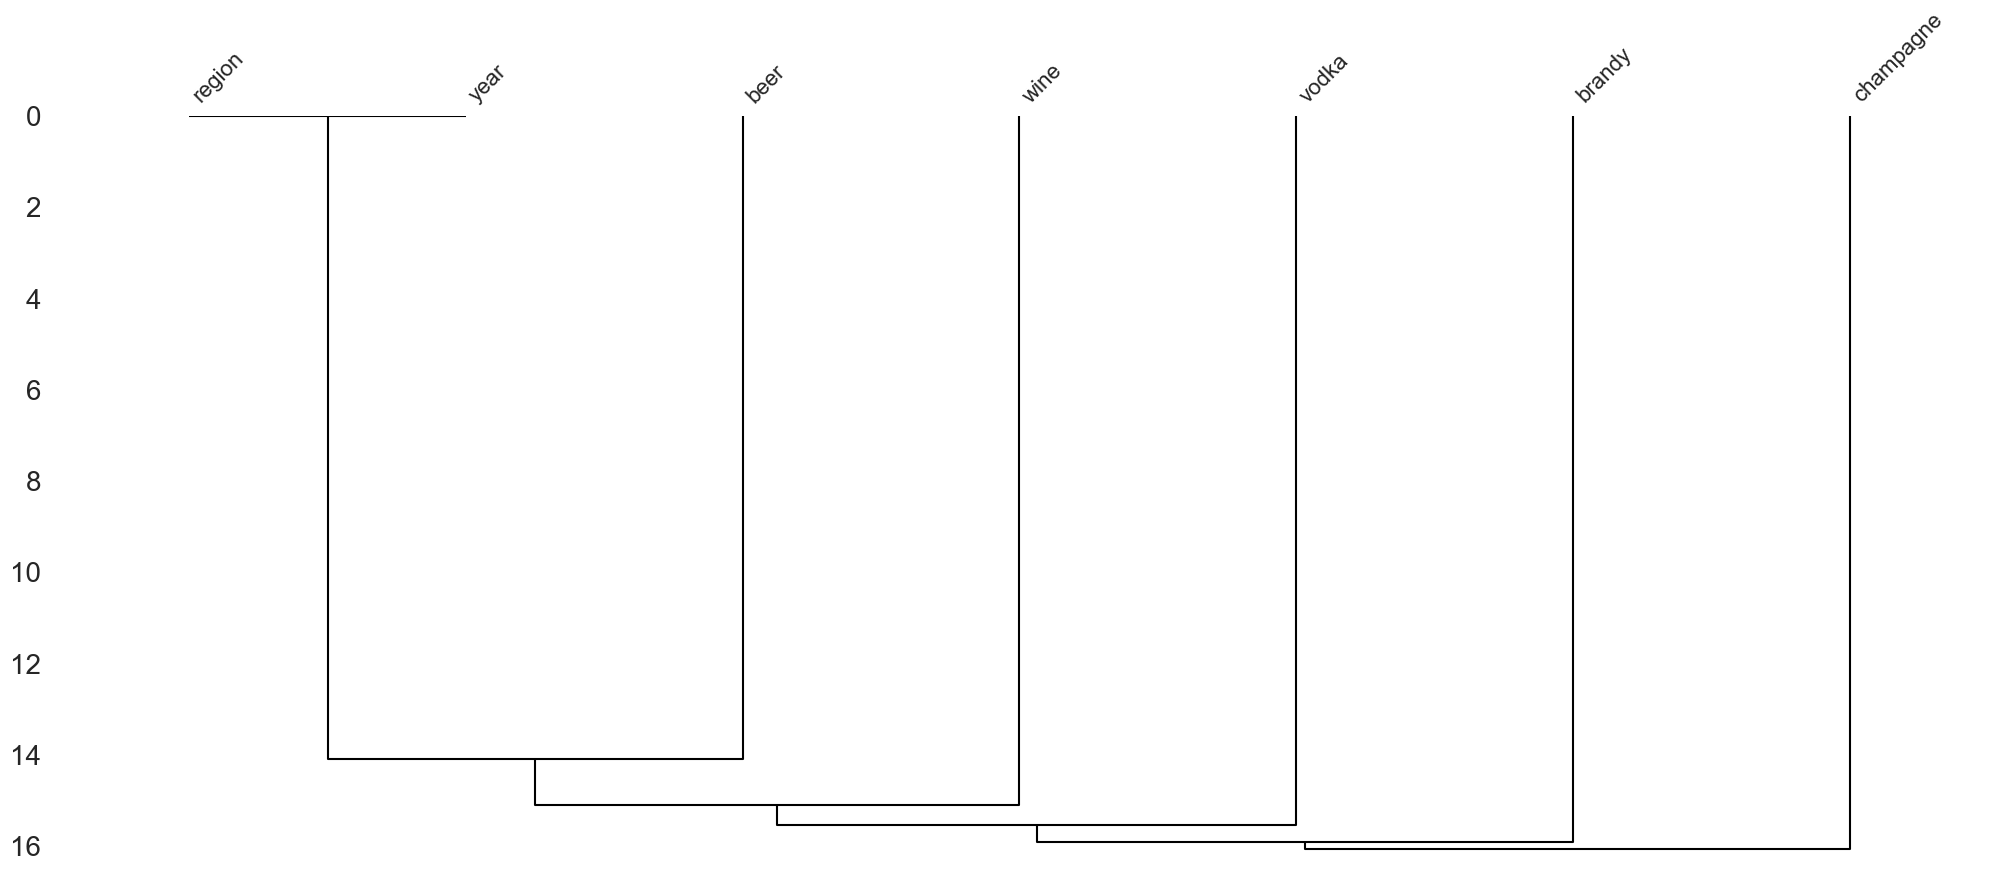

In [3]:
import missingno as msno 

# Plotting the dendrogram of missing values
msno.dendrogram(data_consumption)

This dendrogram shows us that :
- Firstly, both variables region and year are joint together very early in the tree (at 0) which means they share the same pattern of missing values (0% missing).
- Secondly, the missingness of the remaining variables seems to be independant from each other since they are joint at a higher level.

Thus, we can conclude that the missing data are Missing Completely At Random (MCAR) : we now know that we can use a K-Nearest Neighbors Imputer in order to impute the data. To do that, we will use the 'KNNImputer' algorithm from the sklearn library.

In [4]:
from sklearn.impute import KNNImputer

# Selecting columns to impute
good_cols = ['year', 'region']
data_to_impute = data_consumption.drop(good_cols, axis=1).copy()

# K-Nearest Neighbors Imputation
imputer = KNNImputer(n_neighbors=5)
imputed_data = pd.DataFrame(imputer.fit_transform(data_to_impute),
                            columns=data_to_impute.columns)

# Re-adding previoulsy removed columns
imputed_data[good_cols] = data_consumption[good_cols]

display(imputed_data.head())
display(imputed_data.info())

,wine,beer,vodka,champagne,brandy,year,region
0,1.9,8.8,3.4,0.3,0.22,1998,Republic of Adygea
1,3.3,19.2,11.3,1.1,0.10,1998,Altai Krai
2,6.8,21.2,17.3,1.2,0.40,1998,Amur Oblast
3,4.3,10.6,11.7,0.4,0.30,1998,Arkhangelsk Oblast
4,2.9,18.0,9.5,0.8,0.20,1998,Astrakhan Oblast


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   wine       1615 non-null   float64
 1   beer       1615 non-null   float64
 2   vodka      1615 non-null   float64
 3   champagne  1615 non-null   float64
 4   brandy     1615 non-null   float64
 5   year       1615 non-null   int64  
 6   region     1615 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 88.4+ KB


None

We have know imputed the missing data as we can see on the previous output : all variables contains 1615 non-missing values. We can now perform an Exploratory Data Analysis on the newly imputed dataset.

# **2. Exploratory Data Analysis**

The main objective of this project is to make a selection of regions that matches Saint Petersburg Alcohol Consumption. To do so, it may be a good idea to study the drinking habits of this reference and compare it to the global consumption.

### **Saint Petersburg's alcohol consumption**

To understand consumption habits, we will need to have 2 approaches : 
* **Effective :** The actual consumption in Liters.
* **Relative :** The consumption as a share of the total consumption.

The objective of having these two methods is to have a global look over consumption and thus have more information at disposal (Some trends/elements might not be easily noticed using one or another method).

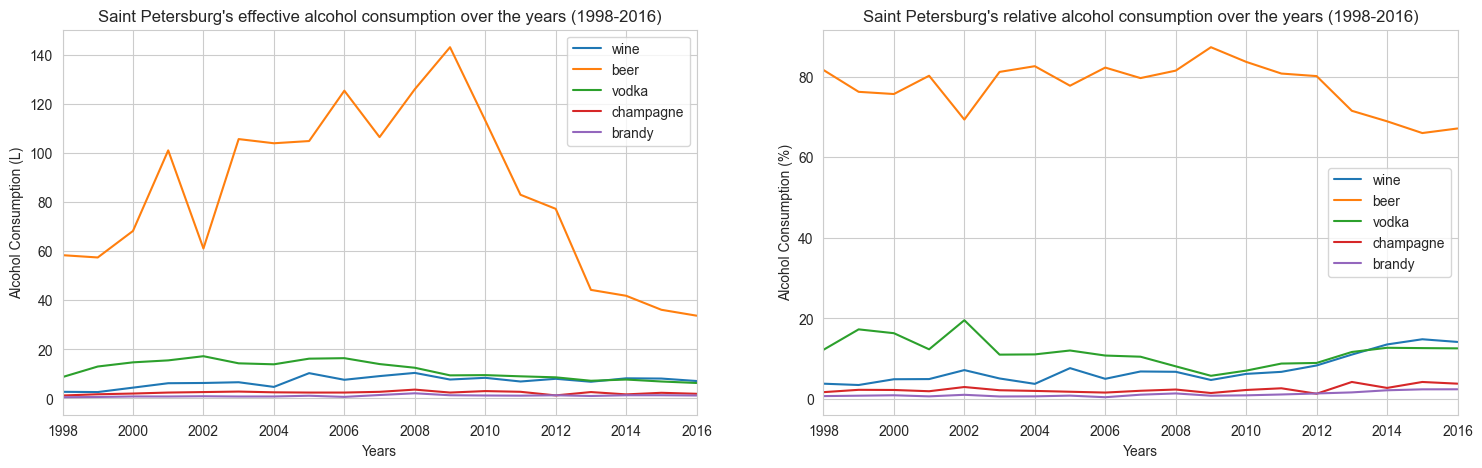

In [43]:
# Selecting Saint Petersburg for effective alcohol consumption 
st_petersburg = imputed_data[imputed_data['region'] == "Saint Petersburg"]

# Calculating shares of alcohol consumption 
alcohols = ['wine', 'beer', 'vodka', 'champagne', 'brandy']
st_petersburg_shr = st_petersburg.copy()

st_petersburg_shr['Total'] = st_petersburg_shr[alcohols].sum(axis=1)

for alcohol in alcohols:
    st_petersburg_shr[alcohol] = (st_petersburg_shr[alcohol] / st_petersburg_shr['Total'])*100


##### Plot Options #####

fig, ax = plt.subplots(1, 2, figsize=(18, 5))


# Plotting the effective consumptions 
st_petersburg.plot(x="year",
                   title="Saint Petersburg's effective alcohol consumption over the years (1998-2016)",
                   xlabel="Years",
                   ylabel="Alcohol Consumption (L)",
                   xlim=(1998,2016),
                   ax=ax[0])

# Plotting the relative consumptions
st_petersburg_shr.drop('Total', axis=1).plot(x="year",
                   title="Saint Petersburg's relative alcohol consumption over the years (1998-2016)",
                   xlabel="Years",
                   ylabel="Alcohol Consumption (%)",
                   xlim=(1998,2016),
                   ax=ax[1]);

According to these two graphs, we can deduce multiples informations from Saint Petersburg :
* The beer consumptions **dominates** any other alcohol consumption with a average share of **80%**. 
* This also **peaks in 2009** with more than 140L per capita and we notice an enormous drop since then : Saint Petersburg's beer consumption **drops to ~35L** per capita in 2016 (4 times lower then 2009).
* In 2002, we can observe a anormal drop in beer consumption of 40L per capita (that can be explained by the imputation of data).
* Wine seems to know a **constant increase** since 1998 that tends to join vodka consumption (~10L per capita in 2016).
* Brandy and Champagne consumption share are rather **stable and remain low** over the years (~2L per capita in general).

Now that we know a little better about Saint Petersburg habits of alcohol consumption, let's compare these to Russia's average consumption.

### **Russia's global alcohol consumption**

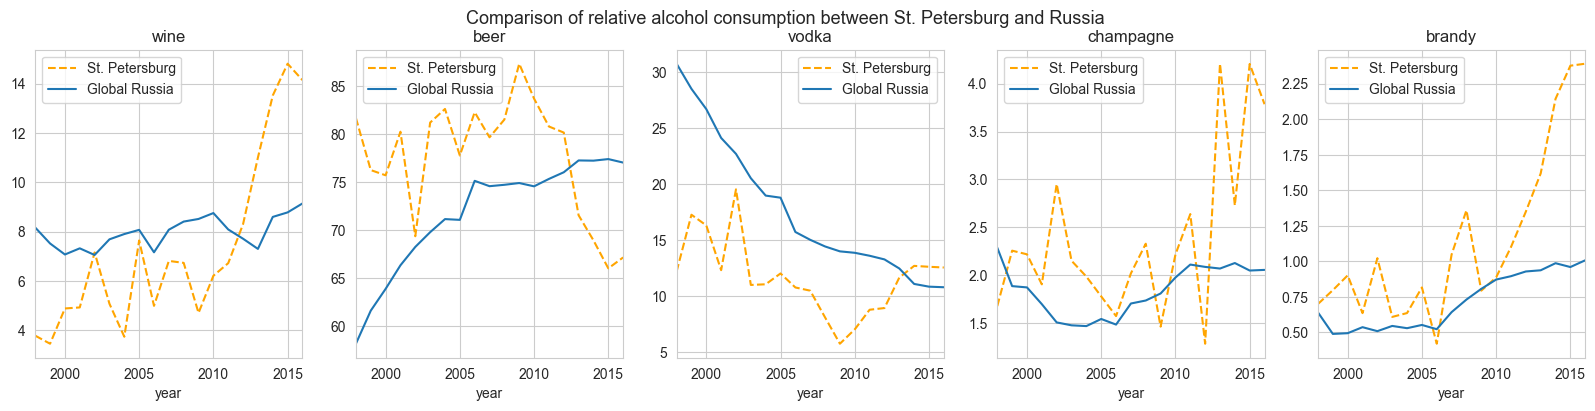

In [60]:
# Selecting Russia regions for effective alcohol consumption 
regions = imputed_data[imputed_data['region']!="Saint Petersburg"].groupby('year')[alcohols].sum().reset_index()

regions['Total'] = regions[alcohols].sum(axis=1)

regions_share = regions.copy()

# Calculating shares of alcohol consumption 
for alcohol in alcohols:
    regions_share[alcohol] = (regions_share[alcohol] / regions_share['Total'])*100


##### Plot Options #####

fig, ax = plt.subplots(1, 5,
                       figsize=(20,4))

# Setting curves labels
labels=['St. Petersburg', 'Global Russia']

# Plotting the curves
for i, alcohol in enumerate(alcohols):

    st_petersburg_shr.groupby('year')[alcohol].sum().plot(ax=ax[i], 
                                                          xlim=(1998, 2016), 
                                                          title=alcohol, 
                                                          color='orange', 
                                                          linestyle='--')
    
    regions_share.groupby('year')[alcohol].sum().plot(ax=ax[i], 
                                                      title=alcohol)
    
    ax[i].legend(labels)
    
# Setting global title
fig.suptitle('Comparison of relative alcohol consumption between St. Petersburg and Russia', fontsize=13);

According to the graph, Saint Petersburg's Alcohol Consumption seems to be very special compared to Russia's average for all kinds of alcohol. Especially for the most recent years : its consumptions tends to highly diverge (except for vodka consumption). We observe differences of ~9% for wine consumption, ~10% for beer consumption, ~2% for vodka and champagne, and ~1,3% for brady in 2016.
We can also notice that champagne and brandy, that seemed low in the previouses graphs, know an increase of more than 100% between 2016 and 2016.


So, as a summary we can say that :
* Saint petersburg is likely to have particular alcohol consumption habits compared to Russia's particularly past 2010.
* Its beer consumption (which holds the main share of alcohol consumption) had un important decrease between 2010 and 2016.
* Wine, Brandy and Champagne relative consumptions exploded compared to russia's average after 2010.
* Vodka relative consumption seems to match Russia's average near 2016.

We now have certain degree of understanding of Saint Petersburg alcohol consumptions and its position relatively to Russia. We now can begin a more complex analysis about Saint Petersburg.

# **3. Principal Component Analysis**

### **Data Transformation with Exponential Weighted Mean**

Since the marketing campaign we need to optimize takes place in 2016, we need to find a way to mainly take into condiseration the most relevant informations which are the habits of consumption over the last few years. In order to do that, we will use the exponential weighted mean method ('ewm') from pandas. The idea behind this method is to calculate a exponentially ponderated mean where the most recent values take the most of the weights in the calculations.

With this method, we can have a summary of the recent habits of consumptions, representative of the recent habits of consumption, and having the informations about past habits.
Here is the formula for exponential weighted mean method :

<center><img src="ressources/ewm.png"/></center>

In [61]:
# Copying the data
russia_share = imputed_data.copy()

# Calculating the shares for all regions
russia_share['Total'] = russia_share[alcohols].sum(axis=1)

for alcohol in alcohols:
    russia_share[alcohol] = (russia_share[alcohol] / russia_share['Total'])*100

# Converting 'year' to datetime
russia_share['year'] = pd.to_datetime(russia_share['year'], format="%Y").dt.year

# Formating the table
temp = pd.pivot_table(data=russia_share, index=['region'], columns=['year'])

# Calculation of the exponential weighted mean for each alcohol share
russia_emv_shr = pd.DataFrame()

alpha = 0.95

for alcohol in alcohols:
    russia_emv_shr[alcohol] = temp[alcohol].ewm(alpha=alpha, axis=1).mean()[2016]

# Printing head of results
russia_emv_shr.head()

,wine,beer,vodka,champagne,brandy
region,,,,,
Altai Krai,8.975302,80.281250,8.851450,1.329407,0.562591
Altai Republic,8.229914,77.190139,12.196626,1.833363,0.549958
Amur Oblast,7.602647,82.970181,7.429855,1.382690,0.614627
Arkhangelsk Oblast,11.106334,67.861004,17.472723,2.373751,1.186188
Astrakhan Oblast,11.476903,76.512237,9.014455,1.798391,1.198013


Now that we have calculated the exponential weighted mean, we can now perform the Principal Component Analysis. With this method, we will be able to :

* Summarize the data into principal components and otpimize the clustering process.
* Make a visual representation of the regions to understand their relationships.

Since all shares have the same unit (%), we shouldn't scale the features since we will lose information if we do so.

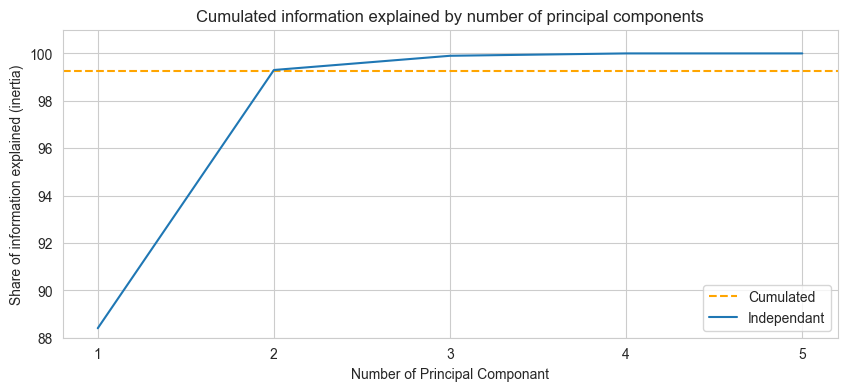

In [79]:
from sklearn.decomposition import PCA

# Initialization of the PCA algorithm
pca = PCA()

# Calculation of the Principal components
russia_pca = pd.DataFrame(pca.fit_transform(russia_emv_shr))

# Inertia Coordinates
xs = [i+1 for i in range(russia_emv_shr.shape[1])]
ys = [round(i, 1) for i in pca.explained_variance_ratio_*100]
cum_ys = np.cumsum([round(i, 1) for i in pca.explained_variance_ratio_*100])


##### Plot Options #####

plt.figure(figsize=(10, 4))

#plt.bar(xs, ys, width=0.4)
plt.axhline(y=99.25, linestyle='--', color='orange')
plt.plot(xs, cum_ys)

# Labels and legend
plt.title('Cumulated information explained by number of principal components')
plt.xlabel('Number of Principal Componant')
plt.ylabel('Share of information explained (inertia)')
plt.legend(['Cumulated', 'Independant'])

# Options
plt.ylim(88, 101)
plt.xticks(ticks=[1, 2, 3, 4, 5], labels=[1, 2, 3, 4, 5]);

On the previous graph, we can see that 2 principal components explain 99.3% of the information contained in the original share data. They are more than enough for our analysis. We can now represent regions in a 2 dimensional space. 

In [152]:
# Selecting the 2 principal components
russia_pca = pd.DataFrame(PCA(n_components=2).fit_transform(russia_emv_shr), columns=["PC1", "PC2"])
russia_pca['region'] = russia_emv_shr.index

def get_color(col):
    return np.where(col=="Saint Petersburg", 'St. Petersburg', "Others")



### Plot Options ###

fig = px.scatter(data_frame=russia_pca,
            x="PC1",
            y="PC2", 
            color=russia_pca['region'].apply(get_color),
            color_discrete_sequence=['orange', 'blue'],
            title="Representation of Saint Petersburg alcohol consumption with Principal Components",
            range_y=[-5, 7],
            range_x=[-20,23])

fig.update_layout(
                autosize=False,
                width=800,
                height=500,
                yaxis={"scaleanchor":"x"},
)

With this visual representation, we can see that Saint Petersburg seems to be in a relatively low concentrated cluster in opposition of the regions whose 1st Principal Component (PC1) is greater than 0. This is in accordance with what we saw in the previouses graphs : Saint Petersburg is a region whose habits of alcohol consumptions are rather special.

# **4. Clustering and segmentation**


We will now perform the region segmentation in order to find the regions that match Saint Petersburg alcohol consumption. These regions are the closest points to Saint Petersburg in the last graph.

To do that, we will be using the 'linkage' method (also known as Ascending Hierarchical Classification) from the scipy library and we will be using the ward distance.

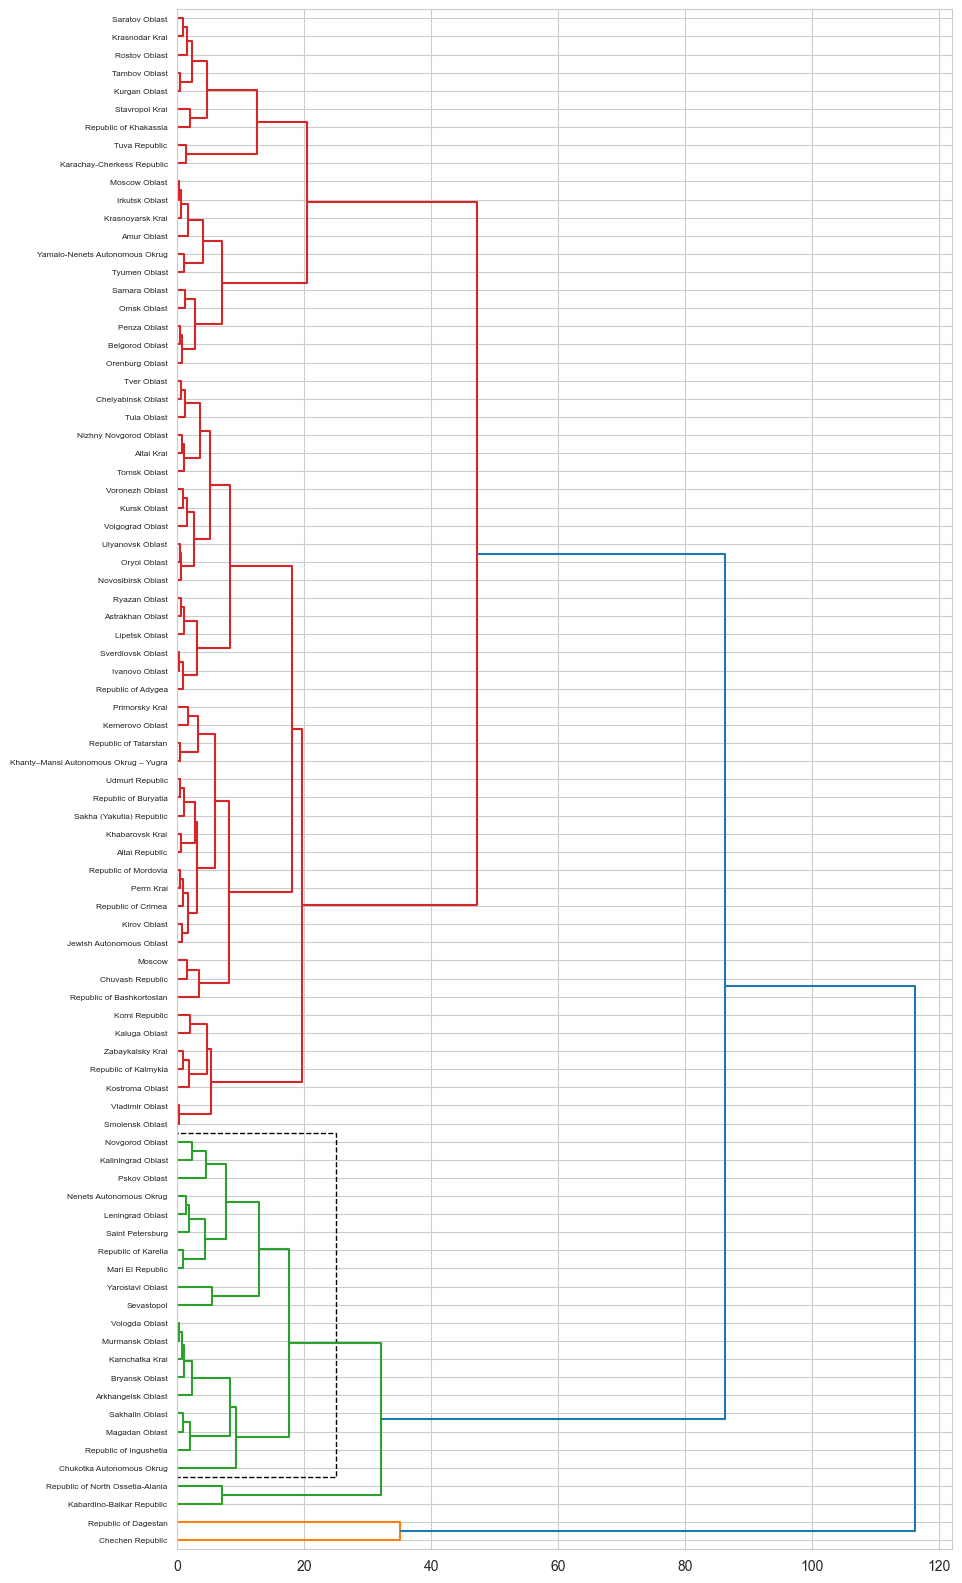

In [154]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib.patches import Rectangle

# Setting index
data_clustering = russia_pca.set_index('region')

# Performing the segmentation
links = linkage(data_clustering, method="ward")


### Plot options ###

plt.figure(figsize=(10, 20))

# Plotting the dendrogram
dendrogram(links, orientation='right', labels=data_clustering.index)

# Adding a black rectangle
plt.gca().add_patch(Rectangle((-20, 40), 
                              45, 
                              190, 
                              facecolor="none", 
                              edgecolor="black", 
                              linestyle='--'));

#plt.xlim(0,10)

The dendrogram shows us a first selection (regions delimited by a black square) of regions that have the same habits of Saint Petersburg regarding alcohol consumption. To select these regions, we need to cut the tree (at t=30 for instance).

Once the dendrogram cut and the group selected, we will replot the same region representation but with colors to ensure we have selected the good regions.

In [156]:
# Cutting Parameter
t = 30

# Adding the 'clusters' columnto the pca data
clusters = fcluster(links, t, criterion='distance')
russia_pca['clusters'] = clusters

# Selecting Saint Petersburg group
st_petersburg_cluster = russia_pca[russia_pca['region']=='Saint Petersburg']['clusters'][61]

# Creating the column colors based on the closeness with Saint Petersburg
russia_pca['colors'] = np.select([russia_pca['region']=="Saint Petersburg",
                      russia_pca['clusters']==st_petersburg_cluster], ['St. Petersburg', "Close"], "Others")


### Plot Options ###

fig = px.scatter(data_frame=russia_pca,
            x="PC1",
            y="PC2", 
            color=russia_pca['colors'],
            color_discrete_sequence=["lightblue", 'royalblue', 'darkblue'],
            title="Representation of Saint Petersburg alcohol consumption with Principal Components",
            range_y=[-5, 7],
            range_x=[-20,23])

fig.update_layout(
                autosize=False,
                width=800,
                height=500,
                yaxis={"scaleanchor":"x",
                       "autorange":False})

We see that the algorithm indeed selected the closest regions to Saint Petersburg. All that is left for us to do is to recalculate coordinates using the actual values of alcohol consumption (second approach that we presented at the beginning) in order to even finer further our results.

In [157]:
def distance_euclidienne(df, coords):
    """
    Calcule la matrice des distances euclidiennes pour les lignes d'une DataFrame.

    :param df: DataFrame contenant les données (doit inclure uniquement des colonnes numériques).
    :return: Une matrice numpy contenant les distances euclidiennes.
    """
    
    temp = df.copy()

    df = df[coords]

    n = len(df)  # Nombre de lignes dans la DataFrame
    distances = np.zeros((n, n))  # Initialisation d'une matrice de zéros
    
    for i in range(n):
        for j in range(n):
            # Calcul de la distance euclidienne entre les lignes i et j
            distances[i, j] = np.sqrt(np.sum((df.iloc[i] - df.iloc[j]) ** 2))
    
    return pd.DataFrame(distances, columns=temp['region'], index=temp['region'])

# Selecting close regions and Saint Petersburg
close_regions = russia_pca[russia_pca['colors'].isin(['Close', 'St. Petersburg'])]

# Calculating distances
coords = ['PC1', 'PC2']
distances = distance_euclidienne(close_regions, coords)
distances = distances['Saint Petersburg'].reset_index()

# Printing head of distance dataframe
distances.head()

,region,Saint Petersburg
0,Arkhangelsk Oblast,5.625198
1,Bryansk Oblast,4.900244
2,Chukotka Autonomous Okrug,11.858986
3,Kaliningrad Oblast,2.357337
4,Kamchatka Krai,5.497094


In [ ]:
# Converting 'year' to datetime format
imputed_data['year'] = pd.to_datetime(imputed_data['year'], format="%Y").dt.year

# Selecting regions similar to Saint Petersburg
similar_regions = distances['region'].tolist()

# Pivoting table
temp = pd.pivot_table(data=imputed_data[imputed_data['region'].isin(similar_regions)], index=['region'], columns=['year'], values=alcohols, aggfunc='sum')

russia_emv = pd.DataFrame()

# Calculating exponential weighted mean
for alcohol in alcohols:
    russia_emv[alcohol] = temp[alcohol].ewm(alpha=alpha, axis=1).mean()[2016]

# Calculating distance to Saint Petersburg
distances = distance_euclidienne(russia_emv.reset_index(), coords=alcohols)

# Selecting top 10 regions
distances = distances['Saint Petersburg'].reset_index().sort_values("Saint Petersburg")[:11]

# Reaffecting regions to distance
ranking = pd.merge(russia_emv, distances, on='region', how='right').sort_values('Saint Petersburg').reset_index(drop=True)[:11]

# Formatting ranking dataframe
ranking.index.name = "Rank"
ranking = ranking.rename(columns={"Saint Petersburg":"Distance from Saint Petersburg"})

ranking['Total'] = ranking[alcohols].sum(axis=1)

ranking

,region,wine,beer,vodka,champagne,brandy,Distance from Saint Petersburg,Total
Rank,,,,,,,,
0,Saint Petersburg,7.150082,33.834759,6.331946,1.918500,1.204964,0.000000,50.440251
1,Bryansk Oblast,7.065381,35.242988,9.577939,0.725525,0.398350,3.821069,53.010183
2,Kaliningrad Oblast,8.595760,38.099607,6.251957,1.400308,1.100364,4.534841,55.447996
3,Vologda Oblast,6.888535,37.246135,9.874406,1.290262,0.588613,5.002948,55.887952
4,Mari El Republic,8.025180,37.914767,9.466422,0.800751,0.694964,5.361591,56.902083
5,Yaroslavl Oblast,10.156226,38.107014,9.073422,1.400276,0.995251,5.925985,59.732189
6,Chukotka Autonomous Okrug,3.950844,33.877267,11.591820,1.839967,1.110500,6.157783,52.370398
7,Pskov Oblast,10.370413,39.110643,6.419226,1.510393,0.794638,6.208706,58.205313
8,Leningrad Oblast,8.168930,41.186287,8.559838,1.610501,1.259614,7.755281,60.785171


Here are our final recommandations for this marketing campaign. Each region is ranked from 0 to 10 (0 is Saint Petersburg).

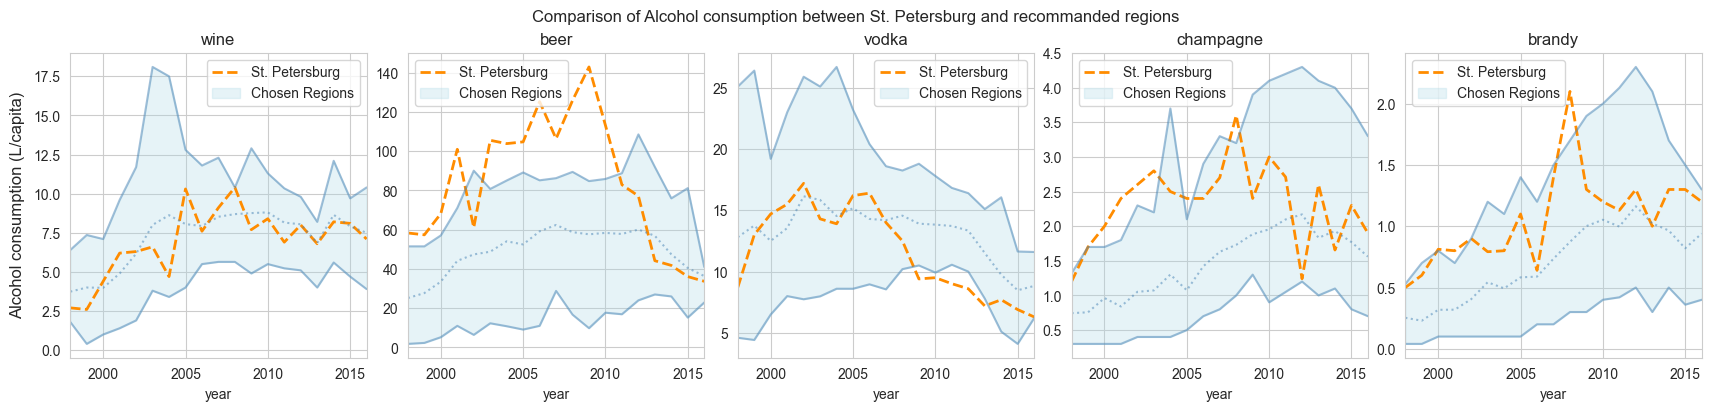

In [174]:
# Selecting the recommanded regions
similar_regions = ranking['region'].to_list()
similar_regions_consumption = imputed_data[imputed_data['region'].isin(similar_regions)]

# Selecting extreme regions among the recommanded ones
extremes = similar_regions_consumption[similar_regions_consumption['region']!="Saint Petersburg"].groupby('year')[alcohols].agg(('min', 'mean', 'max'))


### Plot Options ###

fig, ax = plt.subplots(1, 5,
                       figsize=(17,4),
                       constrained_layout=True)


# Plotting the curves
for i, alcohol in enumerate(alcohols):

    # Plotting Saint Petersburg curve
    st_petersburg.groupby('year')[alcohol].sum().plot(ax=ax[i], xlim=(1998, 2016), title=alcohol, color='darkorange', linestyle='--', label="St. Petersburg", linewidth=2)

    # Plotting alcohol consumption range among the recommanded regions
    ax[i].fill_between(x=extremes.index, y1=extremes[alcohol]['max'], y2=extremes[alcohol]['min'], color="lightblue", alpha=0.3)
    ax[i].plot(extremes.index, extremes[alcohol]['max'], color='steelblue', alpha=0.5)
    ax[i].plot(extremes.index, extremes[alcohol]['mean'], color='steelblue', alpha=0.5, linestyle=":")
    ax[i].plot(extremes.index, extremes[alcohol]['min'], color="steelblue", alpha=0.5)
    
    # Displaing plots legends
    ax[i].legend(['St. Petersburg', 'Chosen Regions'])

fig.supylabel('Alcohol consumption (L/capita)')
fig.suptitle('Comparison of Alcohol consumption between St. Petersburg and recommanded regions');

As we can see, the regions' alcohol consumptions match relatively closely to Saint Petersburg one's, with all these graphs, we are now sure that our recommandations are very close to Saint Petersburg regarding alcohol consumption and thus that our marketing campaign will be a total success.

# What about future ?

In [17]:
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.stattools import adfuller

def ADF_tests(table: pd.DataFrame) -> None:

    for alcohol in alcohols:

        title = f'Augmented Dickey-Fuller test for : {alcohol}'
        print(title)
        print('='*len(title))

        table = table.sort_values('year')
        test = adfuller(table[alcohol])

        print(f'Test p-value : {round(test[1],4)} \n')

ADF_tests(st_petersburg)

Augmented Dickey-Fuller test for : wine
Test p-value : 0.6442 

Augmented Dickey-Fuller test for : beer
Test p-value : 0.5687 

Augmented Dickey-Fuller test for : vodka
Test p-value : 0.9928 

Augmented Dickey-Fuller test for : champagne
Test p-value : 0.0044 

Augmented Dickey-Fuller test for : brandy
Test p-value : 0.0869 



Augmented Dickey-Fuller test for : wine
Test p-value : 0.0001 

Augmented Dickey-Fuller test for : beer
Test p-value : 0.0 

Augmented Dickey-Fuller test for : vodka
Test p-value : 0.0455 

Augmented Dickey-Fuller test for : champagne
Test p-value : 0.0044 

Augmented Dickey-Fuller test for : brandy
Test p-value : 0.0869 



<Axes: xlabel='year'>

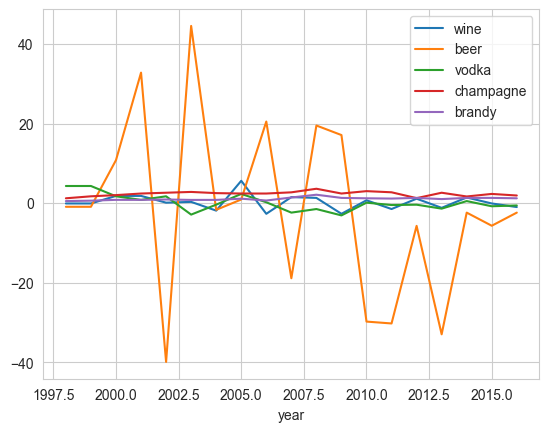

In [18]:
series_to_diff = ['wine', 'beer', 'vodka']

diff = st_petersburg.copy()

for alcohol in series_to_diff:
    diff[alcohol] = st_petersburg[alcohol].diff()
    
diff = diff.fillna(method="bfill")

ADF_tests(diff)

diff.fillna(method="bfill").plot(x='year')

Augmented Dickey-Fuller test for : wine
Test p-value : 0.0001 

Augmented Dickey-Fuller test for : beer
Test p-value : 0.0 

Augmented Dickey-Fuller test for : vodka
Test p-value : 0.0455 

Augmented Dickey-Fuller test for : champagne
Test p-value : 0.0044 

Augmented Dickey-Fuller test for : brandy
Test p-value : 0.0869 



(1998.0, 2016.0)

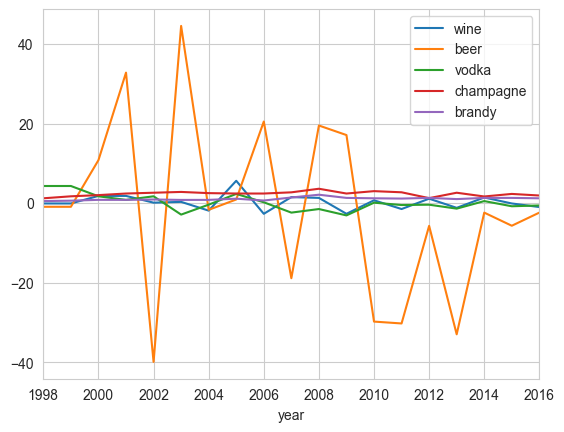

In [19]:
#diff['beer'] = diff['beer'].diff().fillna(method="bfill")

ADF_tests(diff)

diff.plot(x='year')

plt.xlim(1998,2016)

In [20]:
p = []
q = []

diff = diff.set_index('year')
diff.index = pd.to_datetime(diff.index, format='%Y')

model = ARIMA(diff["beer"], order=(1, 0, 1))
model = model.fit()



C:\Users\Cheri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

C:\Users\Cheri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

C:\Users\Cheri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.



In [21]:
model.get_forecast(steps=10).predicted_mean.values
model.bic

181.7755770361978

In [22]:
diff = diff.set_index('year')

KeyError: "None of ['year'] are in the columns"

In [208]:
import datetime as dt

def model_selection(data, var):

    print(f'Step : {alcohol} | Time : {dt.datetime.now()}')

    p = []
    d = []
    q = []
    aic = []
    bic = []

    for temp_p in range(10):
        for temp_q in range(10):
            for temp_d in range(2):
            #data = data.set_index('year').drop('region', axis=1)
                data.index = pd.to_datetime(data.index, format='%Y')

                model = ARIMA(data[var], order=(temp_p, temp_d, temp_q))
                model_fit = model.fit()

                aic.append(model_fit.aic)
                bic.append(model_fit.bic)
                p.append(temp_p)
                d.append(temp_d)
                q.append(temp_q)

    results = pd.DataFrame({
        'p' : p,
        'q' : q,
        'd' : d,
        'AIC' : aic,
        'BIC' : bic})
    
    results = results.sort_values(['AIC', 'BIC']).iloc[0]

    best_model = ARIMA(data[var], order=(results['p'], results['d'], results['q']))
    best_model_fit = best_model.fit()

    globals()[f'{var}_model'] = best_model_fit

from statsmodels.tools.sm_exceptions import ValueWarning

warnings.filterwarnings("ignore", category=ValueWarning)

In [ ]:
diff = st_petersburg.set_index('year').drop('region', axis=1)

for alcohol in alcohols:
    model_selection(diff, alcohol)

Step : wine | Time : 2025-01-04 17:59:29.390485
Step : beer | Time : 2025-01-04 18:00:00.355076


LinAlgError: LU decomposition error.

In [ ]:
forecasting_df = pd.DataFrame({alcohol : globals()[f'{alcohol}_model'].get_forecast(steps=10).predicted_mean.values for alcohol in alcohols})

forecasting_df['year'] = [i for i in range(2017, 2027)]
forecasting_df

,wine,beer,vodka,champagne,brandy,year
0,0.938334,-0.327297,-0.193470,2.063995,1.121526,2017
1,-0.114264,-0.327297,-0.026386,2.148939,1.121526,2018
2,0.457342,-0.327297,0.042286,2.136894,1.121526,2019
3,0.146936,-0.327297,0.070510,2.266488,1.121526,2020
4,0.315499,-0.327297,0.082110,2.266488,1.121526,2021
5,0.223962,-0.327297,0.086878,2.266488,1.121526,2022
6,0.273671,-0.327297,0.088837,2.266488,1.121526,2023
7,0.246677,-0.327297,0.089643,2.266488,1.121526,2024
8,0.261336,-0.327297,0.089974,2.266488,1.121526,2025
9,0.253375,-0.327297,0.090110,2.266488,1.121526,2026


<Axes: xlabel='year'>

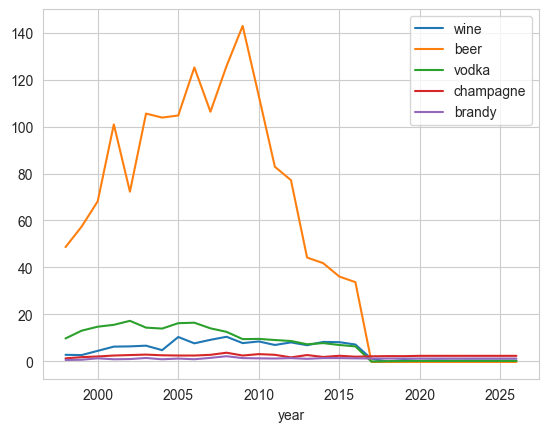

In [200]:
st_petersburg_forecasted = pd.concat([st_petersburg.drop('region', axis=1), forecasting_df]).set_index('year')
st_petersburg_forecasted.plot()

Vérifier avec les régions des gagnants

Now : St Petersburg future